# How to live happier!

A bold statement I know... but maybe there are some lessons we can learn by looking at the countries that are consistently ranking the high on the World Happiness Report and what they are doing differently. 

During this notebook I will walk you through what the data suggests and what factors in these countries could be impacting the hapiness scores. 


## The World Happiness Report

The World Happiness Report is a publication of the Sustainable Development Solutions Network, a division of the United Nations. The World Happiness Report is an intiative after a worldwide demand for more attention to happiness within government policies.
The report ranks countries based on a variety of factors displayed throuhgout this report.

World Happiness Report Database https://www.kaggle.com/datasets/sazidthe1/global-happiness-scores-and-factors

# Key Metrics and Factors

Looking into the metrics and factors used to measure happiness, it is clear this assessment extends beyond simple economic data. It encompasses a multiple factored approach. 

## Global Trends and Patterns

Provide a glimpse of global trends and patterns that the report may reveal. Are there any noticeable shifts or changes in happiness levels around the world? Are certain regions consistently happier than others?


## Happiness and Public Policy

Discuss how the report's findings can influence public policy and decision-making. Highlight that understanding happiness factors can guide governments in creating policies that improve the well-being of their citizens.

## Cultural and Regional Variations

Mention that happiness levels can vary significantly by culture and region. Point out that the report often highlights these variations, shedding light on what contributes to happiness in different parts of the world.

## Challenges and Limitations

Acknowledge that measuring happiness is a complex endeavor with its challenges and limitations. This could include issues related to cultural bias, data accuracy, and subjective interpretation.

## The Impact of the COVID-19 Pandemic

Given that the report may include data from recent years, discuss how the COVID-19 pandemic has likely influenced global happiness levels. Highlight any notable findings in this regard.

## Preview of Report Sections

Provide a brief outline of the main sections or chapters of the report that you'll be discussing in more detail later in your presentation.

So without further to say, lets go!


Firstly let's import the libraries we will use for the analysis!

# Importing Libs and Data

In [100]:
import pandas as pd
import seaborn as sns
# Adding the grid lines so the values in the graphs are easier to comprehend 
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px 

# Create a DataFrame for all the data which has been brought together
concatenated_data = pd.DataFrame()

# Bring together all the separate CSVs
for year in range(2015, 2024):
    filename = f'WHR_{year}.csv'  
    data = pd.read_csv(filename)
    data['year'] = year
    concatenated_data = pd.concat([concatenated_data, data], ignore_index=True)
 

# Filter the concatenated DataFrame by a specific year, e.g., 2018
# I do this so I am able to access the data on a year by year basis if I wanted to conduct a yearly comparison.
year_to_filter = 2015
filtered_data_15 = concatenated_data[concatenated_data['year'] == year_to_filter]

year_to_filter = 2016
filtered_data_16 = concatenated_data[concatenated_data['year'] == year_to_filter]

year_to_filter = 2017
filtered_data_17 = concatenated_data[concatenated_data['year'] == year_to_filter]

year_to_filter = 2018
filtered_data_18 = concatenated_data[concatenated_data['year'] == year_to_filter]

year_to_filter = 2019
filtered_data_19 = concatenated_data[concatenated_data['year'] == year_to_filter]

year_to_filter = 2020
filtered_data_20 = concatenated_data[concatenated_data['year'] == year_to_filter]

year_to_filter = 2021
filtered_data_21 = concatenated_data[concatenated_data['year'] == year_to_filter]

year_to_filter = 2022
filtered_data_22 = concatenated_data[concatenated_data['year'] == year_to_filter]

year_to_filter = 2023
filtered_data_23 = concatenated_data[concatenated_data['year'] == year_to_filter]

# Combine all the filtered dataframes
all_years_data = pd.concat([filtered_data_15, filtered_data_16, filtered_data_17, filtered_data_18, filtered_data_19, filtered_data_20, filtered_data_21, filtered_data_22, filtered_data_23])

# Save the combined data to a CSV file named WHR_All_Years.csv
# all_years_data.to_csv('WHR_concatenated_with_year.csv', index=False)


I have organised the data above so I am able to call on seperate years if I need. For instance if I want to to look at the report from 2021 I would use the below line of code. I use  reset_index as the index is across all the years so it would otherwise say Finland are ranked 935th.

In [101]:
filtered_date_21 = filtered_data_21.reset_index(drop=True)
filtered_date_21.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Finland,Western Europe,7.842,1.446,1.106,0.741,0.691,0.124,0.481,2021
1,Denmark,Western Europe,7.620,1.502,1.108,0.763,0.686,0.208,0.485,2021
2,Switzerland,Western Europe,7.571,1.566,1.079,0.816,0.653,0.204,0.413,2021
3,Iceland,Western Europe,7.554,1.482,1.172,0.772,0.698,0.293,0.170,2021
4,Netherlands,Western Europe,7.464,1.501,1.079,0.753,0.647,0.302,0.384,2021


# EDA and Data Cleaning

In [102]:
# This reads in the CSV we created which has all the years concatenated together
WHR_ALL = pd.read_csv('WHR_concatenated_with_year.csv')

In [103]:
# Using shape we can see how many rows and columns we have in our dataset. We can see here that have 1367 rows across all the 
# years and 10 coulumns.
rows, columns = WHR_ALL.shape
print(f'columns_number:{columns},\nrows_number:{rows}')

columns_number:10,
rows_number:1367


In [104]:
WHR_ALL.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
count,1367.000000,1367.000000,1367.000000,1366.000000,1367.000000,1367.000000,1366.000000,1367.000000
mean,5.441086,1.019422,1.045334,0.584043,0.450771,0.196260,0.132275,2018.903438
std,1.117909,0.453703,0.331163,0.245117,0.156733,0.113301,0.112555,2.561006
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,4.599500,0.696326,0.832022,0.402301,0.356000,0.115000,0.056826,2017.000000
50%,5.440000,1.043000,1.083000,0.612830,0.467610,0.182700,0.097000,2019.000000
75%,6.256300,1.338473,1.299985,0.777614,0.568685,0.252858,0.165945,2021.000000
max,7.842000,2.209000,1.644000,1.141000,0.772000,0.838075,0.587000,2023.000000


In [105]:
# Here I check for any NULLs in the data and see what data types I will be dealing with
WHR_ALL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1367 non-null   object 
 1   region                        1367 non-null   object 
 2   happiness_score               1367 non-null   float64
 3   gdp_per_capita                1367 non-null   float64
 4   social_support                1367 non-null   float64
 5   healthy_life_expectancy       1366 non-null   float64
 6   freedom_to_make_life_choices  1367 non-null   float64
 7   generosity                    1367 non-null   float64
 8   perceptions_of_corruption     1366 non-null   float64
 9   year                          1367 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 106.9+ KB


In [106]:
# We can see here we have two values that NA
WHR_ALL.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       1
year                            0
dtype: int64

In [107]:
# Fill missing values in the 'perceptions_of_corruption' column with the average value for the 'United Arab Emirates' across all years.
WHR_ALL['perceptions_of_corruption'] = WHR_ALL.groupby('country')['perceptions_of_corruption'].transform(lambda x: x.fillna(x.mean()))

# Fill missing values in the 'healthy_life_expectancy' column with the average value of the entire region for the 'State of Palestine,' considering there is only one year record for this state.
WHR_ALL['healthy_life_expectancy'] = WHR_ALL.groupby('region')['healthy_life_expectancy'].transform(lambda x: x.fillna(x.mean()))


In [108]:
# I then checked to make sure this cleared the NA values

WHR_ALL.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
year                            0
dtype: int64

In [109]:
WHR_ALL.head()
# This shows us the top of our data set, which in the case is the top 5 from the year 2015

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


Below is a list of all the countries combinded happiness scores from each year to see who had the largest sum for their hapiness score. 

In [110]:
total_happiness_score = WHR_ALL['happiness_score'].groupby(WHR_ALL['country']).sum()

total_happiness_score

country
Afghanistan    26.9169
Albania        44.0387
Algeria        48.6811
Angola         15.4890
Argentina      56.1917
                ...   
Venezuela      47.7382
Vietnam        47.7855
Yemen          29.5114
Zambia         38.4964
Zimbabwe       32.6762
Name: happiness_score, Length: 171, dtype: float64

# Data Vis

### First let's look at the overall trend in Happiness Score across the year

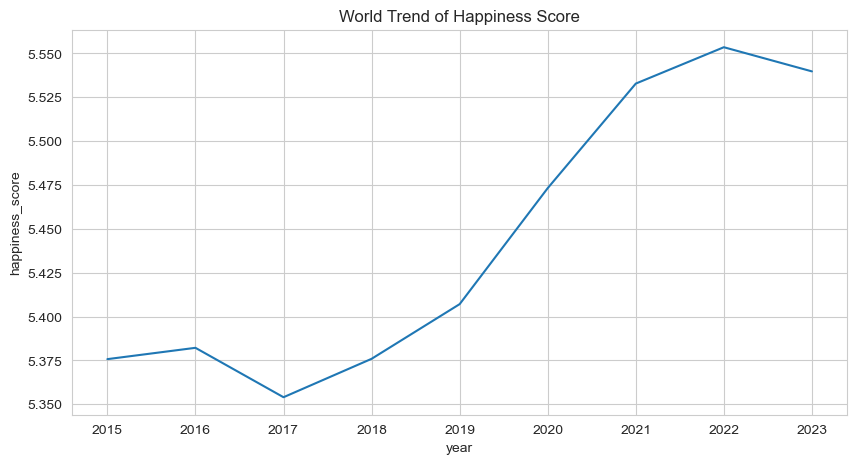

In [166]:
# Create a subplot with a specified size (width: 10, height: 5)
fig, ax = plt.subplots(figsize=(10, 5))

# Set the title of the plot
plt.title('World Trend of Happiness Score')

# Create a line plot using Seaborn, where x-axis represents 'year' and y-axis represents 'happiness_score'
# The err_style=None parameter removes error bars (if any)
sns.lineplot(data=WHR_ALL, x='year', y='happiness_score', err_style=None)

# Display the plot
plt.show()


Here we can see the overall trend in Happiness Score increases over the years. The lowest year was seen in 2017, which coencides with many significant changes in the Global Social System and the Happiest being in 2022 as the world began to open up again after covid.

## Total Happiness Score Averaged up across all years

When using the average of their scores of each year (yearly scores within the range of 0-10). We can see some clear trends!

70% of the countries within the top 20 are European, with 4 out of the top 5 being within the Nordics. One thing we can also see across the results is that Norway and Switzerland fall within the top 10 countries when we measure their Average GDP Per Capita against the same years.

Looking into this a bit further. we can identify another trend across the Nordic countries. We can look deeper into certain cultural aspects such as Danish Hygge (Enjoying the little things and those cosy times with loved ones) and Swedish Fika (A break in the day to have coffee and cake and talk to friends).

In [112]:
# Calculate the mean happiness score and mean GDP per capita for each country.
total_happiness_score = WHR_ALL.groupby('country').agg({'happiness_score': 'mean', 'gdp_per_capita': 'mean'}).reset_index()

# Sort the DataFrame by happiness score in descending order.
total_happiness_score = total_happiness_score.sort_values(by='happiness_score', ascending=False)

# Reset the index and drop the previous index.
total_happiness_score = total_happiness_score.reset_index(drop=True)

# Reset the index to start from 1 and not 0.
total_happiness_score.index = range(1, len(total_happiness_score) + 1)

# Display the DataFrame showing the mean happiness score and mean GDP per capita for each country.
total_happiness_score

# Extract the rank of the United Kingdom from the sorted DataFrame.
UK_rank = total_happiness_score[total_happiness_score['country'] == 'United Kingdom']

# Display the rank of the United Kingdom.
UK_rank

# Display the top 20 countries based on mean happiness score and mean GDP per capita.
total_happiness_score.head(20)


,country,happiness_score,gdp_per_capita
1,Finland,7.662744,1.477332
2,Denmark,7.579733,1.523844
3,Iceland,7.522278,1.511457
4,Switzerland,7.493322,1.596177
5,Norway,7.473889,1.617235
6,Netherlands,7.417100,1.531335
7,Sweden,7.343500,1.517905
8,New Zealand,7.273844,1.435985
9,Canada,7.230456,1.495144
10,Australia,7.227089,1.504091


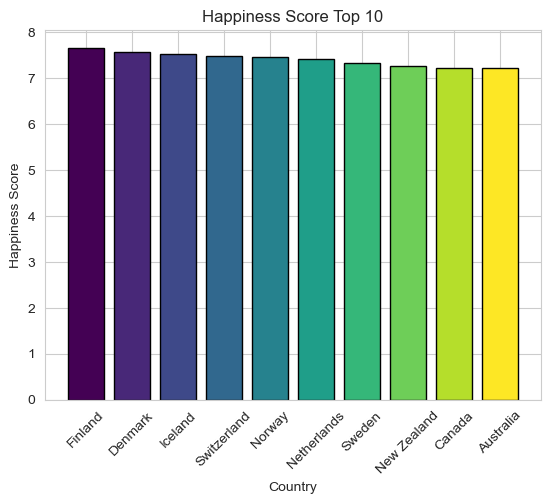

In [113]:
# Here I am taking the average ['happiness_score'] for each country from all the years they have been in the report.
# I then call for the top 10 countries based on their average ['happiness_score']
mean_happiness_by_country = WHR_ALL.groupby('country')['happiness_score'].mean()
mean_happiness_by_country = mean_happiness_by_country.sort_values(ascending=False).head(10)

# Below I create a bar chart to display the countries and see how close all the top 10 countries scores are.
plt.bar(mean_happiness_by_country.index, mean_happiness_by_country, color=plt.cm.viridis(np.linspace(0, 1, len(mean_happiness_by_country))), edgecolor='black')
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.title("Happiness Score Top 10")
plt.xticks(rotation=45)
plt.show()


### We can see that Finland must be doing something right as they rank highest on this graph!

Another fun fact for any fellow linguists is that all of these countries speak a Germanic Language as their main language(Except for Finland, Finnish is part of the Uralic lanaguage family). 

Next we are going to see how Finland's ['happiness_score'] has changed over the years and see if any signifcant jumps were made.

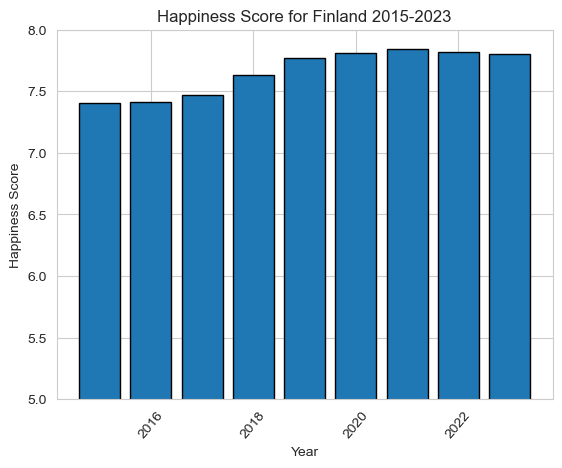

In [114]:
# Filter the data for Finland
finland_data = WHR_ALL[WHR_ALL['country'] == 'Finland']

# Group by 'year' and calculate the mean happiness score for Finland each year
happiness_score_by_year = finland_data.groupby('year')['happiness_score'].mean()

# Create the bar chart
plt.bar(happiness_score_by_year.index, happiness_score_by_year,edgecolor='black')
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.title("Happiness Score for Finland 2015-2023")
plt.xticks(rotation=50)

# Set the limit values for the y axis
plt.ylim(5, 8)
           
plt.show()

Finland has had a steady growth in its ['happiness_score']. It reached its peak score in 2021 7.842 but has stayed over 7.8 for the next two years. 

Lets dive a little deeper and see what else has changed in Finland over this time...

In [167]:
# I filtered to get just data relating to Finland
Finland_WHR = WHR_ALL[WHR_ALL['country']== 'Finland']
#I select only the relevant columns I want to work with
Finland_WHR = Finland_WHR[['country','happiness_score','year','gdp_per_capita','social_support','freedom_to_make_life_choices',
                          'generosity', 'healthy_life_expectancy']]
# Here I assign the index to be the year
Finland_WHR = Finland_WHR.set_index('year', inplace=False)

Finland_WHR

,country,happiness_score,gdp_per_capita,social_support,freedom_to_make_life_choices,generosity,healthy_life_expectancy
year,,,,,,,
2015,Finland,7.4060,1.290250,1.318260,0.641690,0.233510,0.889110
2016,Finland,7.4130,1.405980,1.134640,0.571040,0.254920,0.810910
2017,Finland,7.4690,1.443572,1.540247,0.617951,0.245483,0.809158
2018,Finland,7.6320,1.305000,1.592000,0.681000,0.202000,0.874000
2019,Finland,7.7690,1.340000,1.587000,0.596000,0.153000,0.986000
2020,Finland,7.8087,1.285190,1.499526,0.662317,0.159670,0.961271
2021,Finland,7.8420,1.446000,1.106000,0.691000,0.124000,0.741000
2022,Finland,7.8210,1.892000,1.258000,0.736000,0.109000,0.775000
2023,Finland,7.8040,1.888000,1.585000,0.772000,0.126000,0.535000


## Notable changes

#### - Their GDP per Capita has grown from 2015-2023. They seem to have struggled during 2020 with the COVID-19 Pandemic but have recpvered since and quite gracefully so.

#### - Overall they have had quite a high social support system. With further research I found out that the Finnish government offer many avenues for supporting their citizens, wether that is subsidised energy and housing or free advanced education.

#### - Finland like many countries in Western Europe is very liberal and as we can see their citizens are giving a high ammount of freedom in the lives they live.

#### - One inntersting aspect to consider is that as their Happiness Score has incresed their generosity level has dropped. This could be due to the financial uncertainty after the COVID 19 Pandemic.

# How wealth effects the nations happiness score

### First lets look at the countries with the highest AVG GDP per  capita and see how they compare

In [116]:
# Calculate the mean 'gdp_per_capita' and 'happiness_score' for each country
total_happiness_score = WHR_ALL.groupby('country').agg({'gdp_per_capita': 'mean', 'happiness_score': 'mean'}).reset_index()

# Sort the DataFrame by 'gdp_per_capita' in descending order
total_happiness_score = total_happiness_score.sort_values(by='gdp_per_capita', ascending=False)

# Reset the index and drop the previous index
total_happiness_score = total_happiness_score.reset_index(drop=True)

# Reset the index to start from 1
total_happiness_score.index = range(1, len(total_happiness_score) + 1)

# Display the DataFrame showing the mean 'gdp_per_capita' and 'happiness_score' for each country
total_happiness_score.head(20)


,country,gdp_per_capita,happiness_score
1,Czechia,1.819000,6.882500
2,Luxembourg,1.765006,7.097056
3,Qatar,1.743691,6.421800
4,Singapore,1.721363,6.503900
5,Turkiye,1.714000,4.614000
6,United Arab Emirates,1.691691,6.691089
7,Ireland,1.630440,6.994744
8,Norway,1.617235,7.473889
9,Switzerland,1.596177,7.493322
10,United States,1.572080,6.972844


Observing the data, it is noteworthy that seven out of the top ten countries in terms of GDP per capita also feature prominently in our overall happiness score rankings. This observation implies a significant correlation between a nation's wealth and its overall happiness score. However, intriguing exceptions exist within this relationship. For instance, Turkey exhibits a below-average happiness score but surprisingly secures the 5th position in our rankings.

A similar trend is evident in the case of Hong Kong, suggesting that while a nation's wealth can indeed contribute to its happiness score, this correlation is not universally consistent. Various factors, unaccounted for in this dataset, may influence the nuanced relationship between economic prosperity and overall happiness.

In [146]:
# Create a scatter plot using Plotly Express
fig = px.scatter(WHR_ALL, x='gdp_per_capita', y='happiness_score', color='year', 
                 title='GDP Per Capita Across Years', labels={'gdp_per_capita': 'GDP Per Capita', 'happiness_score': 'Happiness Score'},
                hover_name ='country') # hover_name lets the user see which country each data point relates to.

# Show the plot
fig.show()

An examination of the data reveals a positive correlation between GDP per Capita and Happiness Score over the years. Notably, in the later years, a substantial increase in GDP per Capita is observed; however, the corresponding trend in Happiness Score does not exhibit a proportionate trajectory.

# Check for correlation between the metrics

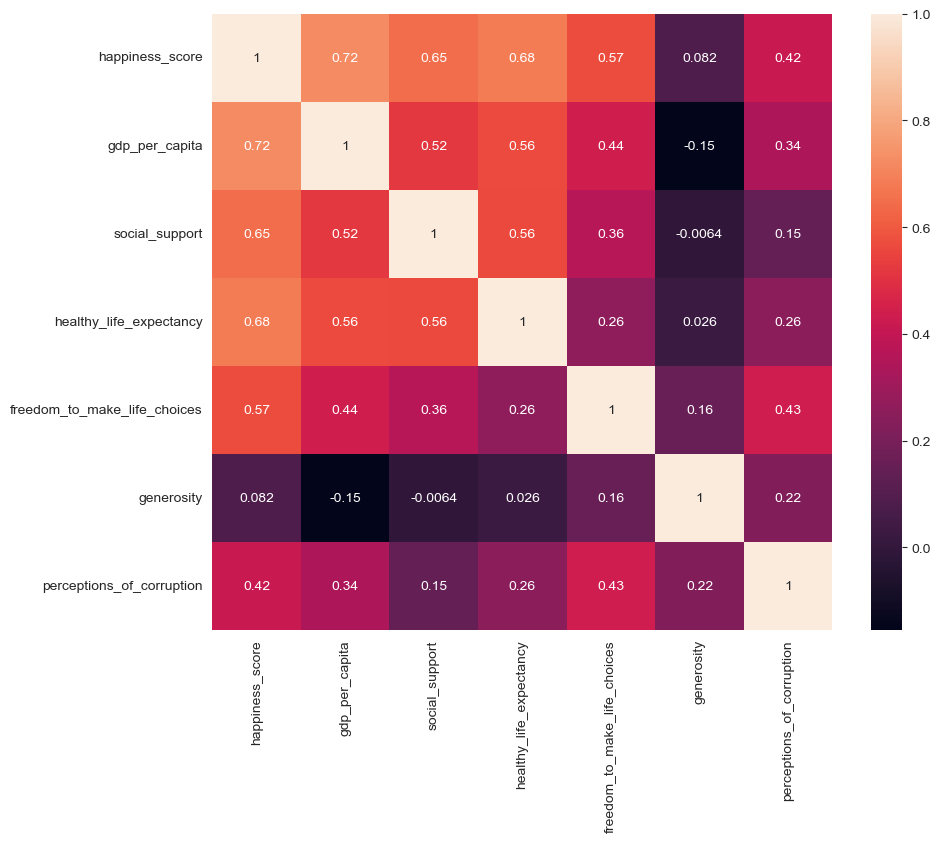

In [118]:
# Select numerical columns from the WHR_ALL dataframe
WHR_ALL_num = WHR_ALL.select_dtypes('number')

# Drop the 'year' column from the numerical columns
WHR_ALL_num = WHR_ALL_num.drop(['year'], axis=1)

# Calculate the correlation matrix
corr = WHR_ALL_num.corr()

# Set the size of the figure for better visualization
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn to visualize the correlation matrix
# Annotate the cells with the correlation values for better interpretation
sns.heatmap(corr, annot=True)

# Display the heatmap
plt.show()

Upon analysis, a robust positive correlation emerges between GDP per Capita and Happiness Score. Additionally, noteworthy negative correlations are observed between generosity and both GDP per Capita and social support

# Comparing the top 10 and bottom 10 countries

In [119]:
# Selecting the top 10 happiness score countries by average and storing it in a variable called Happiest10
Happiest10 = WHR_ALL.groupby('country').happiness_score.mean().reset_index().sort_values(by= 'happiness_score', ascending= False)[:10]
# Selecting the bottom 10 happiness score countries by average and storing it in a variable called LeastHappiest10
LeastHappiest10 = WHR_ALL.groupby('country').happiness_score.mean().reset_index().sort_values(by= 'happiness_score', ascending= False)[-10:]

In [131]:
def plotly_bars(WHR_ALL, x, y, title, color, xlabel, ylabel):
    """
    Create and display a Plotly bar chart.

    Parameters:
        WHR_ALL (DataFrame): The input DataFrame containing the data.
        x (str): The column name for the x-axis.
        y (str): The column name for the y-axis.
        title (str): The title of the plot.
        color (str): The column name for color differentiation.
        xlabel (str): The label for the x-axis.
        ylabel (str): The label for the y-axis.

    Returns:
        None
    """
    # Create a bar chart using Plotly Express
    fig = px.bar(WHR_ALL, x, y, title=title, color=color, text_auto=True, width=1400, height=500, labels={'country': xlabel, 'y': ylabel})
    
    # Display the plot
    return fig.show()

In [152]:
plotly_bars(LeastHappiest10, LeastHappiest10['country'], LeastHappiest10['happiness_score'].round(2), 'Lowest 10 happiness score countries', LeastHappiest10['country'], 'Country', 'Happiness score')

The least happiest 10 countries are all in Africa and the Middle East(Except Afghanistan which is in South Asia).

In [127]:
plotly_bars(Happiest10, Happiest10['country'], Happiest10['happiness_score'].round(2), 'Top 10 happiness score countries', Happiest10['country'], 'Country', 'Happiness score')

All of these countries are from Europe and North America + ANZ. 

# Regional Overview

In [128]:
region = WHR_ALL.groupby('region').happiness_score.mean().reset_index().sort_values(by= 'happiness_score', ascending= False)[:10]

In [130]:
plotly_bars(region, region['region'], region['happiness_score'].round(2), 'AVG happiness score by regions', region['region'], 'Region', 'Happiness score') 

We can see that the happiest regions are North America and ANZ, Western Europe and Latin America and Caribbean and the lowest average Happiness Scores come from The Middle East and Africa and South Asia.

# Biggest Changes across the years

In [164]:
# Selecting 'country' and 'happiness_score' columns from filtered_data_15 and filtered_data_23
WHR_15 = filtered_data_15[['country', 'happiness_score']]
WHR_23 = filtered_data_23[['country', 'happiness_score']]

# Merging the two DataFrames based on the 'country' column
WHR_15_23 = WHR_15.merge(WHR_23, how='left', on='country')

# Renaming the columns to 'country', '2015', and '2023'
columns = ['country', '2015', '2023']
WHR_15_23.columns = columns

# Calculating the trend by subtracting '2015' from '2023' for each row
WHR_15_23['trend'] = WHR_15_23.apply(lambda x: x['2023'] - x['2015'], axis=1)

# Finding the top 10 countries with the biggest improvements in trend
Biggest_Improvements = WHR_15_23.sort_values(by='trend', ascending=False)[:10]

# Finding the top 10 countries with the biggest drops in trend
Biggest_Drops = WHR_15_23.sort_values(by='trend', ascending=True)[:10]

# Define a custom color scale from dark blue to light blue
custom_color_scale = px.colors.sequential.YlOrRd[::-1]  # Reverse the 'YlOrRd' color scale for a dark-to-light transition

# Create a bar chart using Plotly Express with the custom color scale
fig = px.bar(Biggest_Improvements, x='country', y='trend', text='trend',
             title='Top 10 Countries with The Least Positive Progress in Happiness Score (2015-2023)',
             labels={'country': 'Country', 'trend': 'Trend'},
             color='trend', color_continuous_scale=custom_color_scale)

# Set the text format to round to 2 decimal places
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside', hovertemplate='Country: %{x}<br>Trend: %{y:.2f}')

# Show the plot
fig.show()


In [165]:
# Define a custom color scale from dark blue to light blue
custom_color_scale = px.colors.sequential.Blues[::-1]  # Reverse the 'Blues' color scale for a dark-to-light transition

# Create a bar chart using Plotly Express with the custom color scale
fig = px.bar(Biggest_Drops, x='country', y='trend', text='trend',
             title='Top 10 Countries with The Least Positive Progress in Happiness Score (2015-2023)',
             labels={'country': 'Country', 'trend': 'Trend'},
             color='trend', color_continuous_scale=custom_color_scale)

# Set the text format to round to 2 decimal places
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside', hovertemplate='Country: %{x}<br>Trend: %{y:.2f}')

# Show the plot
fig.show()